In [1]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Drive already mounted at /content/GoogleDrive; to attempt to forcibly remount, call drive.mount("/content/GoogleDrive", force_remount=True).


In [2]:
!pip install split-folders

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, zero_one_loss
from imutils import paths

import matplotlib.pyplot as plt
import splitfolders
import cv2
import random

In [4]:
inputFolder = '/content/GoogleDrive/MyDrive/notebooks/dataset/test'
outputFolder = '/content/GoogleDrive/MyDrive/notebooks/dataset/new'

In [5]:
splitfolders.ratio(inputFolder, outputFolder, seed = 44, ratio = (0.8, 0.0, 0.2))

Copying files: 1047 files [00:45, 23.01 files/s]


In [6]:
imgPaths = list(paths.list_images(outputFolder))
if imgPaths:
    print(imgPaths[0].split('/'))
else:
    print("No images found.")

random.shuffle(imgPaths)

classes = [] # classes = ['brain_tumor', 'brain_menin', 'brain_glioma']
for imgPath in imgPaths:
  className = imgPath.split('/')[-2]

  if className not in classes:
    classes.append(className)

#print(classes)

X_train = []
y_train = []

X_test = []
y_test = []

IMGSIZE = 128
img_names = []

for imgPath in imgPaths:
  trainOrTest = imgPath.split('/')[-3]
  className = imgPath.split('/')[-2]

  img = cv2.imread(imgPath) #cv2.IMREAD_GRAYSCALE
  img = cv2.resize(img, (IMGSIZE,IMGSIZE))

  if trainOrTest == 'train':
    X_train.append(img)
    y_train.append(classes.index(className))
    img_names.append(imgPath.split('/')[-1])

  elif trainOrTest == 'test':
    X_test.append(img)
    y_test.append(classes.index(className))

print(len(X_train), len(y_train))
print(len(X_test), len(y_test))

['', 'content', 'GoogleDrive', 'MyDrive', 'notebooks', 'dataset', 'new', 'train', 'brain_menin', 'brain_menin_0129.jpg']
837 837
210 210


In [7]:
df = pd.DataFrame({
    'File Name' : img_names,
    'Category' : y_train
})

# print(classes.index('brain_tumor'))
# print(classes.index('brain_glioma'))
# print(classes.index('brain_menin'))

print(classes)
df.head()

['brain_glioma', 'brain_menin']


,File Name,Category
0,brain_glioma_1365.jpg,0
1,brain_menin_0130.jpg,1
2,brain_glioma_4322.jpg,0
3,brain_glioma_2815.jpg,0
4,brain_glioma_4834.jpg,0


In [8]:
X_train = np.array(X_train)
y_train = np.array(y_train)

X_test = np.array(X_test)
y_test = np.array(y_test)

In [10]:
model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (3, 3), activation = 'relu', input_shape = (IMGSIZE, IMGSIZE, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(128, activation = 'relu'))
model.add(Dropout(0.25))

model.add(Dense(64, activation = 'relu'))
model.add(Dense(3, activation = 'softmax'))

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])
history = model.fit(X_train, y_train, validation_data = (X_test, y_test), epochs = 15)
# val_loss, val_acc = model.evaluate(X_test, y_test)

y_pred = model.predict(X_test)

model.summary()

Epoch 1/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.7993 - loss: 1.1609 - val_accuracy: 0.9524 - val_loss: 0.3568
Epoch 2/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9591 - loss: 0.1992 - val_accuracy: 0.9524 - val_loss: 0.2945
Epoch 3/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 81s 2s/step - accuracy: 0.9611 - loss: 0.1683 - val_accuracy: 0.9524 - val_loss: 0.2334
Epoch 4/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 42s 2s/step - accuracy: 0.9567 - loss: 0.1567 - val_accuracy: 0.9524 - val_loss: 0.4186
Epoch 5/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.9600 - loss: 0.1281 - val_accuracy: 0.9524 - val_loss: 0.1933
Epoch 6/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.9548 - loss: 0.1500 - val_accuracy: 0.9524 - val_loss: 0.2074
Epoch 7/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 89s 2s/step - accuracy: 0.9671 - loss: 0.0947 - val_accuracy: 0.9524 - val_loss: 0.1420
Epoch 8/15
27/27 ━━━━━━━━━━━━━━━━━━━━ 45s 2s/step - accuracy: 0.9514 - loss: 0.1112 - val_accuracy: 0.9524 - val_loss:

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 126, 126, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 126, 126, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 63, 63, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 61, 61, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 30, 30, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 28, 28, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 256)                 │       6,422,784 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 19,672,395 (75.04 MB)

 Trainable params: 6,557,443 (25.01 MB)

 Non-trainable params: 64 (256.00 B)

 Optimizer params: 13,114,888 (50.03 MB)

In [11]:
model.save('/content/GoogleDrive/MyDrive/Colab notebooks/dataset/model3.h5')
# new_model = model.load_weights('/content/GoogleDrive/MyDrive/Colab Notebooks/Neural Networks/Selected2 Project/model.h5')

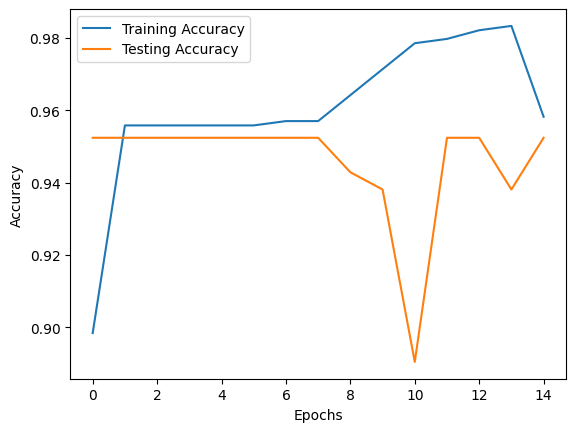

In [12]:
# epochs = range(1,15)
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

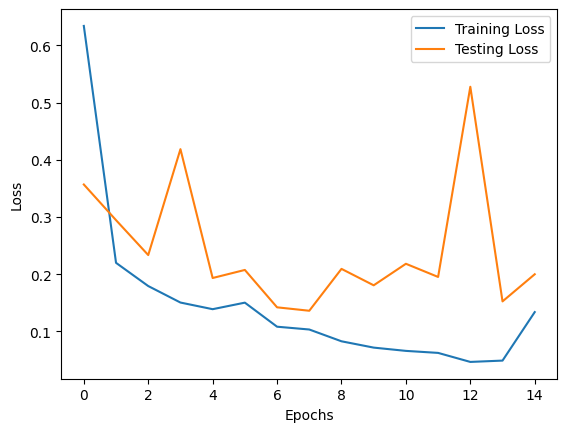

In [13]:
plt.plot(history.history['loss'], label = 'Training Loss')
plt.plot(history.history['val_loss'], label = 'Testing Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [14]:
len(y_pred)

210

In [15]:
print(classes)
print(y_test[:25], '\n')
print(y_pred[:25], '\n')

predict = []
for i in range(210): #len(y_pred)
  predict.append(np.argmax(y_pred[i]))

print(predict[:25], '\n')

cm = confusion_matrix(y_test, predict)
print(cm, '\n')

zol = zero_one_loss(y_test, predict, normalize = False)
print(zol)

['brain_glioma', 'brain_menin']
[0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0] 

[[9.9777526e-01 2.2247010e-03 5.4389741e-08]
 [9.9408442e-01 5.9150429e-03 4.8768538e-07]
 [9.9991351e-01 8.6361004e-05 8.9864706e-11]
 [9.8232073e-01 1.7669955e-02 9.2871696e-06]
 [9.9866927e-01 1.3307984e-03 1.5592514e-08]
 [9.9797595e-01 2.0239120e-03 1.3977748e-07]
 [9.9901050e-01 9.8937692e-04 1.3067728e-08]
 [9.9968374e-01 3.1624085e-04 1.7748851e-09]
 [9.9939835e-01 6.0147600e-04 6.0817604e-09]
 [9.9643242e-01 3.5671911e-03 3.9125817e-07]
 [9.9999982e-01 1.4159157e-07 7.3796910e-18]
 [9.9636483e-01 3.6344607e-03 6.9755424e-07]
 [9.7894025e-01 2.1051776e-02 7.9126794e-06]
 [9.9722171e-01 2.7780854e-03 2.2905164e-07]
 [9.9955243e-01 4.4754788e-04 8.5953517e-10]
 [9.9860537e-01 1.3945543e-03 4.1979707e-08]
 [9.9795759e-01 2.0422551e-03 3.6611354e-08]
 [9.9999994e-01 3.9142684e-10 3.2912287e-23]
 [9.9026775e-01 9.7302478e-03 2.0182317e-06]
 [9.9995500e-01 4.4959539e-05 2.6919638e-12]
 [9.9817365e-0

<Figure size 500x500 with 0 Axes>

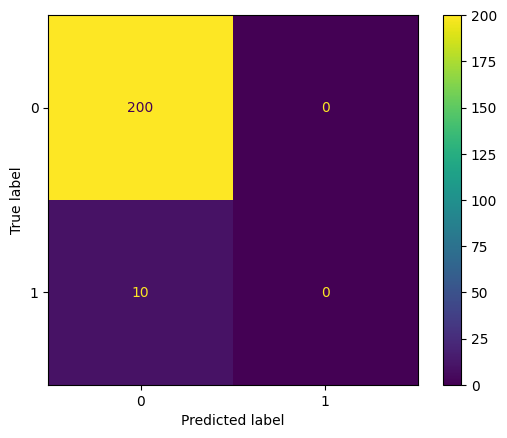

In [16]:
plt.figure(figsize = (5,5))
ConfusionMatrixDisplay(cm).plot()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
[[0.7817149  0.21591848 0.00236661]]
['brain_glioma', 'brain_menin']


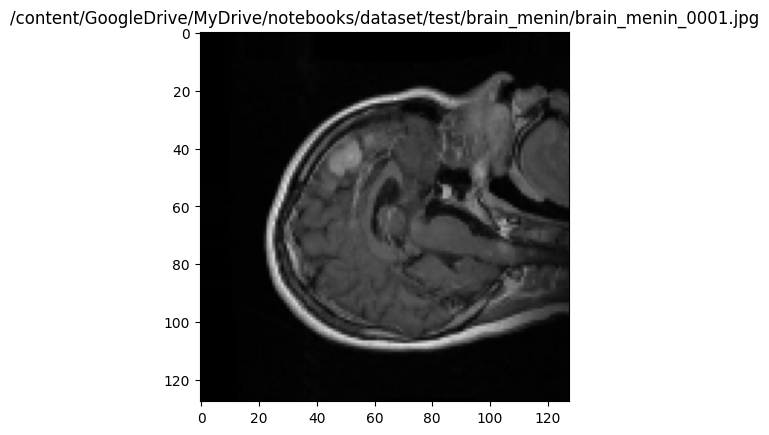

In [17]:
test_img_path = '/content/GoogleDrive/MyDrive/notebooks/dataset/test/brain_menin/brain_menin_0001.jpg'

test_img = cv2.imread(test_img_path)
test_img = cv2.resize(test_img, (128,128))

plt.imshow(test_img)
plt.title(test_img_path.split('\\')[-1])

test_img = test_img[tf.newaxis, ...]

print(model.predict(test_img))
print(classes)